# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Hadi
- Email: adybeldex@gmail.com
- Id Dicoding: muhammad_hadi_5j4u

## Menentukan Pertanyaan Bisnis

- Jam berapa orang paling sering meminjam sepeda pada saat weekend dan weekday?
- Bagaimana performa total peminjaman sepeda dalam beberapa bulan terakhir?
- Musim apa saja yang paling banyak dan sedikit user peminjaman sepeda?
- Hal apa saja yang mempengaruhi peminjaman sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


fitur **dteday** memiliki tipe data object, yang seharusnya direpresentasikan tipe data **datetime**. selain itu beberapa fitur memiliki nama yang kurang dipahami, oleh karena itu akan ada penamaan ulang agar fitur-fitur tersebut dapat dimengerti. fitur-fitur yang dimaksud adalah **yr, hr, mnth, hum, dan cnt**

In [4]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pada dataset hours tidak ditemukan duplikasi data maupun nilai yang menyimpang.

### Cleaning Data

tahap pertama yang akan dilakukan dalam cleaning data pada dataset hours adalah menghapus column instant yang mana column ini tidak dibutuhkan dalam proses kedepannya.

In [5]:
hours_df = hours_df.drop('instant', axis=1)

langkah selanjutnya adalah melakukan perbaikan masalah yang telah didapatkan dari assesing data yaitu mengubah tipe data dteday ke date time.

In [6]:
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

yang terakhir adalah melakukan penamaan ulang agar fitur mudah dimengerti

In [7]:
hours_df = hours_df.rename(columns={'yr': 'year', 'hr': 'hour', 'mnth': 'month' , 'hum':'humidity', 'cnt':'total'})
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  total       17379 non-null  int64         
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis (EDA)

### Explorasi Data hours_df

pada dataset **hours_df** terdapat fitur-fitur seperti jumlah **casual** user, **registered** user serta **total** casual dan registered user per **jam**.

In [8]:
hours_df.sample(5)

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total
13207,2012-07-09,3,1,7,12,0,1,1,2,0.74,0.6818,0.58,0.1343,61,205,266
1419,2011-03-04,1,0,3,10,0,5,1,1,0.24,0.2273,0.60,0.2537,10,56,66
3885,2011-06-15,2,0,6,19,0,3,1,1,0.70,0.6364,0.37,0.2836,54,362,416
12217,2012-05-29,2,1,5,6,0,2,1,1,0.66,0.6061,0.78,0.2239,9,145,154
3628,2011-06-05,2,0,6,2,0,0,0,2,0.64,0.6212,0.61,0.1642,16,48,64


sebagai permulaan kita akan melihat rangkuman parameter statistik dari hours_df dengan menggunakan method `describe()`

In [9]:
hours_df[["casual","registered", "total"]].describe(include="all")

,casual,registered,total
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


dari rangkuman parameter statistik diatas, kita mendapatkan informasi bahwa **total** peminjaman tertinggi dalam 1 jam adalah **977**, sedangkan untuk **registered user** tertinggi dalam 1 jam adalah 886 dan **casual user** 367.

untuk rata-rata peminjaman dalam 1 jam sekitar **189.4** untuk **total**, **153.7** untuk **registered user** dan **35.6** untuk c**asual user**.

jika dilihat dari data, fitur season berupa angka 1-4 yang mana ini sulit untuk dibaca dan dimengerti. agar mudah dimengerti, angka-tersebut akan diberikan nama di kolom baru melalui fungsi berikut.

In [10]:
def season_grouping(x):
    if (x == 1):
        return 'Spring'
    elif (x == 2):
        return 'Summer'
    elif (x == 3):
        return 'Fall'
    elif (x == 4):
        return 'Winter'

In [11]:
hours_df["season_group"] = hours_df.season.apply(season_grouping)
hours_df.head(5)

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total,season_group
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Spring
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Spring
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Spring
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Spring
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Spring


setelah menjalankan kode diatas, maka kolom baru akan dibuat dengan nama-nama season didalamnya.

untuk mendapatkan rangkuman statistik casual, registered dan total user berdasarkan season. kita bisa memanfaatkan method `groupby()` dan `agg()`.

In [ ]:
hours_df.groupby(by="season_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "total": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
                max min       mean        std        max min        mean   
season_group                                                               
Fall            350   0  50.287144  51.751916        886   0  185.729093   
Spring          367   0  14.290901  27.463006        681   0   96.823668   
Summer          361   0  46.160581  57.455803        782   0  162.183488   
Winter          362   0  30.666824  46.034058        876   0  168.202032   

                         total                              
                     std   max min        mean         std  
season_group                                                
Fall          166.430156   977   1  236.016237  197.711630  
Spring        104.347605   801   1  111.114569  119.224010  
Summer        152.751493   957   1  208.344069  188.362473  
Winter        157.559340   967   1  198.868856  182.967972

dari rangkuman statistik diatas, dapat dilihat bahwa total user tertinggi terjadi pada saat musim gugur/fall season dan total user terendah terjadi pada saat spring season.

sama halnya dengan season, weather situation juga dalam bentuk angka yang sulit dimengerti. agar dapat dimengerti, angka tersebut akan diterjemahkan menjadi deskriptif dengan fungsi dibawah ini.

In [12]:
def weathersit_grouping(x):
    if (x == 1):
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif (x == 2):
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif (x == 3):
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    elif (x == 4):
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

In [13]:
hours_df["weathersit_group"] = hours_df.weathersit.apply(weathersit_grouping)
hours_df.head(5)

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total,season_group,weathersit_group
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Spring,"Clear, Few clouds, Partly cloudy, Partly cloudy"


setelah menjalankan kode diatas, kolom baru akan terbentuk yang berisi deskripsi dari weathersit.

untuk mendapatkan rangkuman statistik berdasarkan weather situation kita bisa menggunakan method `groupby()` dan `agg()`

In [14]:
hours_df.groupby(by="weathersit_group").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "total": ["max", "min", "mean", "std", ]
})

casual                 \
                                                      max min       mean   
weathersit_group                                                           
Clear, Few clouds, Partly cloudy, Partly cloudy       367   0  40.545431   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      6   1   2.666667   
Light Snow, Light Rain + Thunderstorm + Scatter...    263   0  16.055673   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...    350   0  29.595290   

                                                              registered      \
                                                          std        max min   
weathersit_group                                                               
Clear, Few clouds, Partly cloudy, Partly cloudy     53.126559        886   0   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   2.886751        158  22   
Light Snow, Light Rain + Thunderstorm + Scatter...  30.017327        791   0   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  41.356704        822   0   

                                                                            \
                                                          mean         std   
weathersit_group                                                             
Clear, Few clouds, Partly cloudy, Partly cloudy     164.323841  156.890453   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   71.666667   75.048873   
Light Snow, Light Rain + Thunderstorm + Scatter...   95.523608  114.773469   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  145.570202  142.390431   

                                                   total                  \
                                                     max min        mean   
weathersit_group                                                           
Clear, Few clouds, Partly cloudy, Partly cloudy      977   1  204.869272   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   164  23   74.333333   
Light Snow, Light Rain + Thunderstorm + Scatter...   891   1  111.579281   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   957   1  175.165493   

                                                                
                                                           std  
weathersit_group                                                
Clear, Few clouds, Partly cloudy, Partly cloudy     189.487773  
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   77.925178  
Light Snow, Light Rain + Thunderstorm + Scatter...  133.781045  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  165.431589

dari rangkuman statistik diatas, kita dapat menyimpulkan bahwa kondisi cuaca yang buruk dapat mempengaruhi peminjaman sepeda. hal ini terlihat dari kondisi cuaca saat **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog** yang hanya mencatat total peminjaman sepeda sebesar **164**.

untuk melihat rangkuman statistik berdasarkan workingday kita bisa memanfaatkan method **groupby('workingday')** dan **agg()**

In [15]:
hours_df.groupby(by="workingday").agg({
    "casual": ["max", "min", "mean", "std", ],
    "registered": ["max", "min", "mean", "std", ],
    "total": ["max", "min", "mean", "std", ]
})

casual                           registered                  \
              max min       mean        std        max min        mean   
workingday                                                               
0             367   0  57.441422  71.713021        601   0  123.963910   
1             264   0  25.561315  29.130487        886   0  167.646439   

                       total                              
                   std   max min        mean         std  
workingday                                                
0           107.779533   783   1  181.405332  172.853832  
1           165.990865   977   1  193.207754  185.107477

dari rangkuman statistik diatas, dapat disimpulkan bahwa orang **lebih banyak** meminjam sepeda pada saat **workingday** dengan total **977** sedangkan pada saat weekend/liburan hanya **783**.

untuk mendapatkan rangkuman statistik casual, registered, dan total user berdasarkan tanggal kita bisa menggunakan method `groupby()` dan `agg()`.

In [17]:
hours_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
dteday,,,
2012-09-15,3160,5554,8714
2012-09-29,2589,5966,8555
2012-09-22,2512,5883,8395
2012-03-23,2469,5893,8362
2012-05-19,3410,4884,8294
...,...,...,...
2011-03-06,114,491,605
2011-01-26,34,472,506
2012-12-26,9,432,441


dari rangkuman statistik diatas, diperoleh informasi 5 tanggal teratas dengan total peminjaman sepeda terbanyak terjadi pada saat tahun 2012. dan 5 terbawah didominasi tahun 2011.

untuk mendapatkan jumlah casual, registered dan total peminjaman sepeda berdasarkan jam kita bisa menggunakan method `groupby()` dan `agg()` seperti pada kode dibawah.

In [18]:
hours_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


dari hasil diatas, diketahui bahwa jam 17, 18 dan 8 menjadi jam dengan peminjaman sepeda terbanyak.

apakah hasil diatas sama pada saat workingday atau weekend/holiday?

kita bisa mengetahuinya dengan membuat dataframe baru yang hanya berisi data workingday atau weekend/holiday.

pada fitur workingday, angka 1 menunjukkan bahwa data tersebut merupakan workingday, sedangkan angka 0 menunjukkan apabila data tersebut merupakan data weekend/holiday.

In [33]:
workingday_hours_df = hours_df[hours_df['workingday'] == 1]
holiday_hours_df = hours_df[hours_df['workingday'] == 0]

dari kode diatas, kita sudah mendapatkan dataframe baru yaitu **workingday_hours_df** dan **holiday_hours_df**.

dari dataframe baru tersebut, kita akan menjumlahkan casual, registered, dan total user berdasarkan jam dengan menggunakan method `groupby()` dan `agg()`.

In [20]:
holiday_hours_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
13,31514,54587,86101
12,29163,55443,84606
14,32246,51987,84233
15,31532,51354,82886
16,29710,51770,81480
17,25829,48911,74740
11,24637,48201,72838
18,19371,45272,64643
10,18311,40804,59115


dari hasil diatas, pada saat holiday/weekend menunjukkan hasil yang berbeda dengan sebelumnya.

pada saat holiday/weekend user cenderung banyak meminjam pada saat siang menjelang sore hari.

In [21]:
workingday_hours_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,casual,registered,total
hour,,,
17,28391,233729,262120
18,25125,220004,245129
8,11043,225552,236595
19,20429,153075,173504
16,24124,122144,146268
7,6049,138095,144144
20,15622,108738,124360
9,12059,107734,119793
15,23074,77189,100263


pada saat workingday hasilnya hampir sama dengan hasil global. yang terbanyak pada jam 17,18 dan 8.

## Visualization & Explanatory Analysis

untuk menjumlah casual, registered dan total user berdasarkan salah satu fitur di dataframe, kita bisa menggunakan method `groupby()` dan `agg()`. agar lebih efisien kita akan memasukkan nya dalam fungsi `create_feature_rented_df`

In [22]:
def create_feature_rented_df(df, feature):
    df = df.groupby(by=feature).agg({
        "casual": "sum",
        "registered": "sum",
        "total": "sum"
    }).sort_values(by="total", ascending=False).reset_index()

    new_hours_df = pd.melt(df, id_vars=[feature], value_vars=["casual", "registered", "total"],
                           var_name="type", value_name="total")

    return new_hours_df

### Jam berapa orang paling sering meminjam sepeda pada saat weekend dan weekday?

membuat dataframe baru dari dataframe yang berisi hanya data-data holiday dan melakukan grouping berdasarkan **hour**.

In [23]:
new_holiday_hours_df = create_feature_rented_df(holiday_hours_df, 'hour')
new_holiday_hours_df

<ipython-input-22-1daf15488ff3>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  new_hours_df = pd.melt(df, id_vars=[feature], value_vars=["casual", "registered", "total"],


,hour,type,total
0,13,casual,31514
1,12,casual,29163
2,14,casual,32246
3,15,casual,31532
4,16,casual,29710
...,...,...,...
67,7,total,10027
68,3,total,5851
69,6,total,4292
70,5,total,1929


membuat clustered bar chart dari dataframe `new_holiday_hours_df`

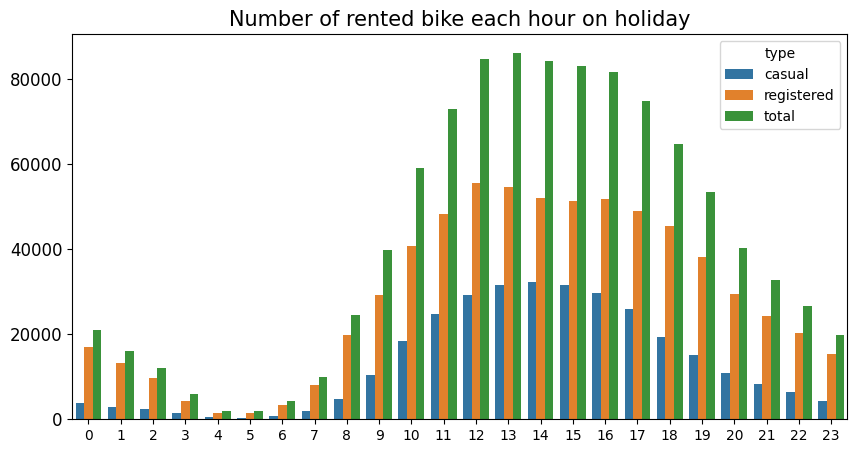

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(data=new_holiday_hours_df, x="hour", y="total", hue="type",  errorbar="sd")
plt.title("Number of rented bike each hour on holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

membuat dataframe baru dari dataframe yang berisi hanya data-data workingday dan melakukan grouping berdasarkan **hour**.

In [25]:
new_workingday_hours_df = create_feature_rented_df(workingday_hours_df, 'hour')
new_workingday_hours_df

<ipython-input-22-1daf15488ff3>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  new_hours_df = pd.melt(df, id_vars=[feature], value_vars=["casual", "registered", "total"],


,hour,type,total
0,17,casual,28391
1,18,casual,25125
2,8,casual,11043
3,19,casual,20429
4,16,casual,24124
...,...,...,...
67,5,total,12332
68,1,total,8177
69,2,total,4229
70,4,total,2552


membuat clustered bar chart dari dataframe `new_workingday_hours_df`

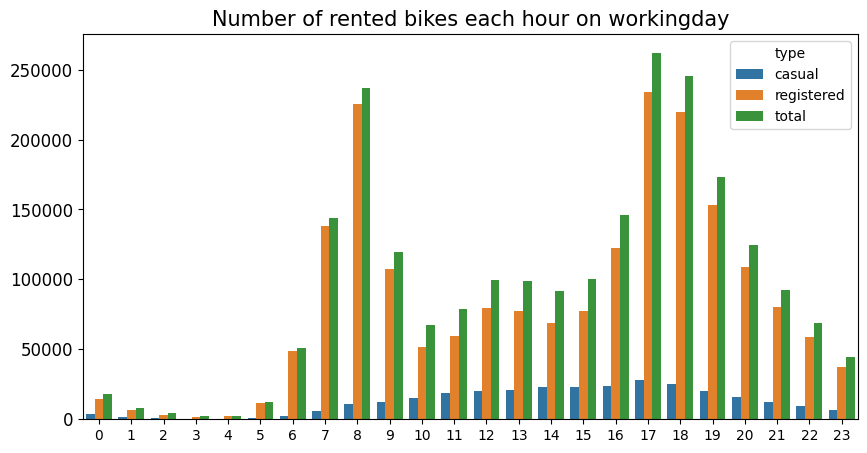

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=new_workingday_hours_df, x="hour", y="total", hue="type",  errorbar="sd")
plt.title("Number of rented bikes each hour on workingday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Bagaimana performa total peminjaman sepeda dalam beberapa bulan terakhir?

memfilter data tahun 2012 kemudian membuat dataframe baru berisi jumlah casual, registered dan total peminjaman sepeda per bulan.

In [27]:
#melakukan filter data dengan mengambil data hanya pada tahun 2012
hours_2012_df = hours_df[hours_df['year']== 1]

monthly_rented_df = hours_2012_df.resample(rule='M', on='dteday').agg({
    "total": "sum",
    "casual": "sum",
    "registered": "sum"
})
monthly_rented_df.index = monthly_rented_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_rented_df = monthly_rented_df.reset_index()
monthly_rented_df.head()

,dteday,total,casual,registered
0,January,96744,8969,87775
1,February,103137,8721,94416
2,March,164875,31618,133257
3,April,174224,38456,135768
4,May,195865,44235,151630


membuat line chart dari data peminjaman sepeda per bulan

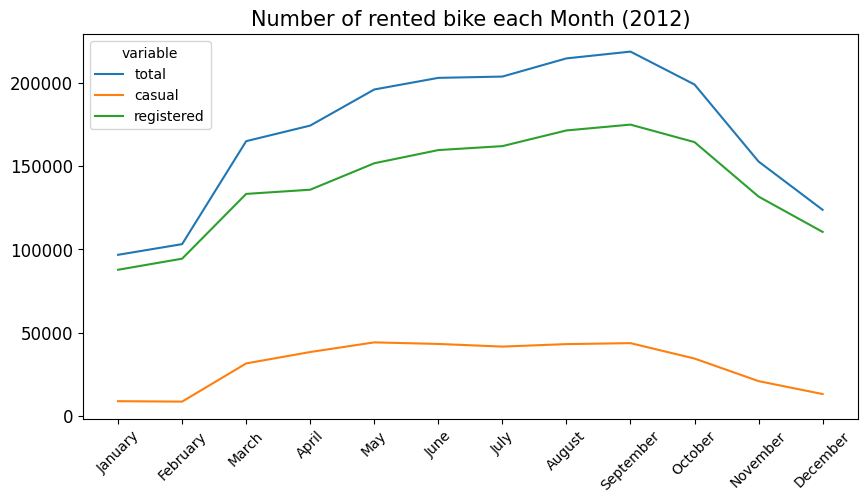

In [28]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='dteday', y='value', hue='variable',
             data=pd.melt(monthly_rented_df, ['dteday']))

plt.title("Number of rented bike each Month (2012)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.xticks(rotation=45)
plt.show()

### Musim apa saja yang paling banyak dan sedikit user peminjaman sepeda?

membuat dataframe yang berisi jumlah casual, registered dan total peminjaman sepeda berdasarkan season.

In [30]:
new_season_df = create_feature_rented_df(holiday_hours_df, 'season_group')
new_season_df

<ipython-input-22-1daf15488ff3>:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  new_hours_df = pd.melt(df, id_vars=[feature], value_vars=["casual", "registered", "total"],


,season_group,type,total
0,Fall,casual,107345
1,Summer,casual,105693
2,Winter,casual,71294
3,Spring,casual,32400
4,Fall,registered,204711
5,Summer,registered,182283
6,Winter,registered,191260
7,Spring,registered,105283
8,Fall,total,312056
9,Summer,total,287976


membuat clustered bar chart bersarkan season.

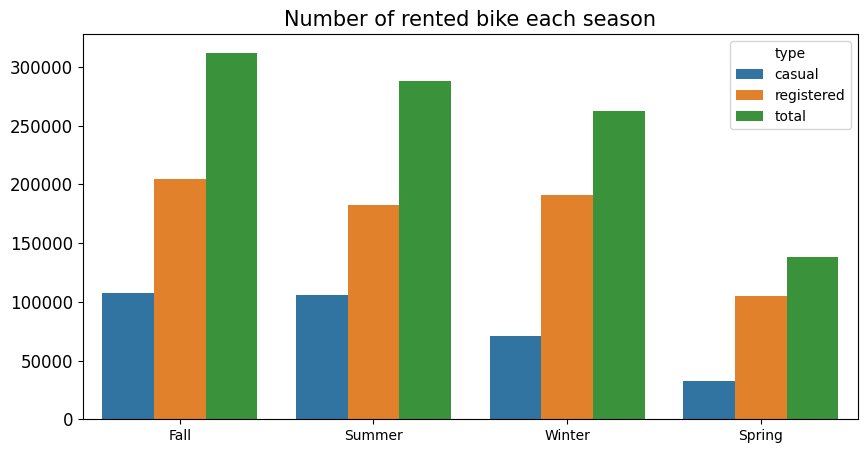

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(data=new_season_df, x="season_group", y="total", hue="type",  errorbar="sd")
plt.title("Number of rented bike each season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

plt.show()

### Hal apa saja yang mempengaruhi peminjaman sepeda?

membuat correlation matrix dan memvisualisasikannya

<ipython-input-32-a9bb66402f04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hours_df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix')

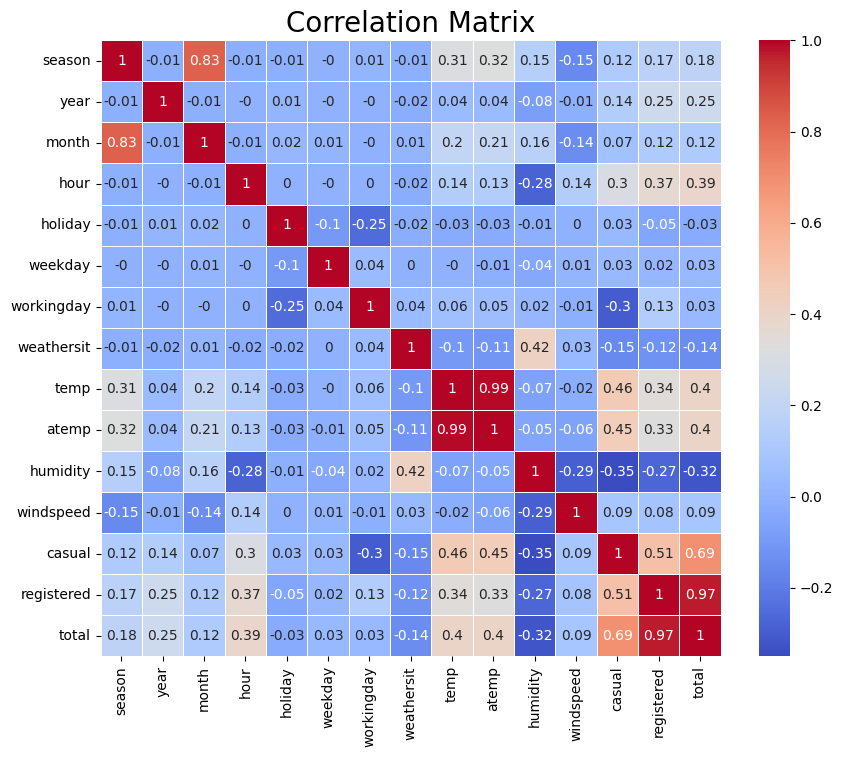

In [32]:
plt.figure(figsize=(10, 8))
correlation_matrix = hours_df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

## Conclusion

- Conclution *Jam berapa orang paling sering meminjam sepeda pada saat weekend/holiday dan weekday*

pada saat **workingday**, user sering meminjam sepeda hanya pada saat pagi hari di **jam 8** kemudian **jam 17** dan **18 petang**.
sedangkan pada siang hari, angka nya relatif medium.
angka terkecil terjadi pada saat dini hari, yaitu setelah jam 12 malam sampai jam 5 pagi.


pada saat **weekend/holiday**, peminjaman sepeda per jam membentuk pola gradual dan menuju puncaknya pada jam 13.00. berbeda dengan **workingday**, pada saat dini hari masih banyak user yang masih meminjam sepeda dan angkanya mengecil di jam 4 dan 5 pagi.

- Conclution *Bagaimana performa total peminjaman sepeda dalam beberapa bulan terakhir*

angka peminjaman sepeda pada awal (januar, februari) dan akhir tahun (desember) cenderung sedikit dibanding bulan-bulan lainnya. sedangkan bulan dengan angka peminjaman terbanyak terjadi pada bulan september.

- Conclution *Musim apa saja yang paling banyak dan sedikit user peminjaman sepeda*

season dengan angka peminjaman terbanyak terjadi pada saat fall sedangkan season dengan angka peminjaman terkecil terjadi pada saat spring.

pada saat summer dan winter angka peminjaman relatif sama, yang membedakan hanya pada casual user.

- Conclution *Hal apa saja yang mempengaruhi peminjaman sepeda*

berdasarkan correlation matrix, faktor-faktor yang mempengaruhi total peminjaman sepeda adalah **temp**, **atemp**, **hour** dan **humidity**.

In [ ]:
hours_df.to_csv("all_data.csv", index=False)